In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reviewers.csv')

In [3]:
df

,Username,Movie Id,Movie,Rating
0,bevo-13678,tt0110912,Pulp Fiction,10
1,kylopod,tt0110912,Pulp Fiction,10
2,SebMoz,tt0110912,Pulp Fiction,10
3,gogoschka-1,tt0110912,Pulp Fiction,10
4,gautammayya,tt0110912,Pulp Fiction,10
...,...,...,...,...
2147542,jcullen_s,tt4425200,John Wick: Chapter 2,7
2147543,antonpopescu,tt4425200,John Wick: Chapter 2,1
2147544,sykesm-25135,tt4425200,John Wick: Chapter 2,9
2147545,Tweekums,tt4425200,John Wick: Chapter 2,8


In [4]:
df = df.replace([1,2,3,4,5,6], 0)

In [5]:
df

,Username,Movie Id,Movie,Rating
0,bevo-13678,tt0110912,Pulp Fiction,10
1,kylopod,tt0110912,Pulp Fiction,10
2,SebMoz,tt0110912,Pulp Fiction,10
3,gogoschka-1,tt0110912,Pulp Fiction,10
4,gautammayya,tt0110912,Pulp Fiction,10
...,...,...,...,...
2147542,jcullen_s,tt4425200,John Wick: Chapter 2,7
2147543,antonpopescu,tt4425200,John Wick: Chapter 2,0
2147544,sykesm-25135,tt4425200,John Wick: Chapter 2,9
2147545,Tweekums,tt4425200,John Wick: Chapter 2,8


In [6]:
df = df.drop(df[df.Rating < 7].index)

In [7]:
df

,Username,Movie Id,Movie,Rating
0,bevo-13678,tt0110912,Pulp Fiction,10
1,kylopod,tt0110912,Pulp Fiction,10
2,SebMoz,tt0110912,Pulp Fiction,10
3,gogoschka-1,tt0110912,Pulp Fiction,10
4,gautammayya,tt0110912,Pulp Fiction,10
...,...,...,...,...
2147541,HelenMary,tt4425200,John Wick: Chapter 2,7
2147542,jcullen_s,tt4425200,John Wick: Chapter 2,7
2147544,sykesm-25135,tt4425200,John Wick: Chapter 2,9
2147545,Tweekums,tt4425200,John Wick: Chapter 2,8


In [8]:
df1 = pd.DataFrame(df.Username.value_counts().reset_index())
df1.columns = ['Username', 'RCount']
df1

,Username,RCount
0,SnoopyStyle,2245
1,lee_eisenberg,1890
2,Quinoa1984,1664
3,kosmasp,1621
4,claudio_carvalho,1601
...,...,...
471954,Mamady,1
471955,vanessamac,1
471956,princesadeamor15,1
471957,waterspritemd,1


In [9]:
merged = pd.merge(df, df1, on='Username')

In [10]:
merged

,Username,Movie Id,Movie,Rating,RCount
0,bevo-13678,tt0110912,Pulp Fiction,10,1031
1,bevo-13678,tt1872181,The Amazing Spider-Man 2,10,1031
2,bevo-13678,tt0111161,The Shawshank Redemption,10,1031
3,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031
4,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031
...,...,...,...,...,...
1161210,josh-edmunds,tt4425200,John Wick: Chapter 2,9,1
1161211,jameslindsay93,tt4425200,John Wick: Chapter 2,10,1
1161212,rrosewater,tt4425200,John Wick: Chapter 2,10,1
1161213,paul-90243,tt4425200,John Wick: Chapter 2,9,1


In [11]:
merged = merged.drop(merged[merged.RCount < 10].index)

In [12]:
merged

,Username,Movie Id,Movie,Rating,RCount
0,bevo-13678,tt0110912,Pulp Fiction,10,1031
1,bevo-13678,tt1872181,The Amazing Spider-Man 2,10,1031
2,bevo-13678,tt0111161,The Shawshank Redemption,10,1031
3,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031
4,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031
...,...,...,...,...,...
1122448,Otuoacheampong97,tt2398241,Smurfs: The Lost Village,7,10
1122449,Otuoacheampong97,tt1160419,Dune,8,10
1122450,Otuoacheampong97,tt1846589,Hunter Killer,7,10
1122451,Otuoacheampong97,tt1950186,Ford v Ferrari,8,10


In [13]:
merged['UserId'] = pd.factorize(merged['Username'])[0]+1
merged['MovieId'] = pd.factorize(merged['Movie'])[0]+1

In [14]:
uf = pd.DataFrame(merged.UserId.value_counts().reset_index())
uf.columns = ['Id', 'IdCount']
uf

,Id,IdCount
0,237,2245
1,757,1890
2,9,1664
3,2235,1621
4,21,1601
...,...,...
11686,6662,10
11687,6682,10
11688,6686,10
11689,10478,10


In [15]:
merged

,Username,Movie Id,Movie,Rating,RCount,UserId,MovieId
0,bevo-13678,tt0110912,Pulp Fiction,10,1031,1,1
1,bevo-13678,tt1872181,The Amazing Spider-Man 2,10,1031,1,2
2,bevo-13678,tt0111161,The Shawshank Redemption,10,1031,1,3
3,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031,1,4
4,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10,1031,1,4
...,...,...,...,...,...,...,...
1122448,Otuoacheampong97,tt2398241,Smurfs: The Lost Village,7,10,11691,4554
1122449,Otuoacheampong97,tt1160419,Dune,8,10,11691,1198
1122450,Otuoacheampong97,tt1846589,Hunter Killer,7,10,11691,4540
1122451,Otuoacheampong97,tt1950186,Ford v Ferrari,8,10,11691,1013


In [36]:
from datetime import datetime

now = datetime.now()

print(now.second)
print(now.microsecond)
print(str(now.second) + '.' + str(now.microsecond))

19
619630
19.619630


In [51]:
before = datetime.now()

print(str(before.second) + '.' + str(before.microsecond))

print(merged.loc[merged['UserId'] == 31])

after = datetime.now()

print(str(after.second) + '.' + str(after.microsecond))

41.437963
                Username   Movie Id  \
11241  terryzhangtianrun  tt0110912   
11242  terryzhangtianrun  tt0114369   
11243  terryzhangtianrun  tt0118715   
11244  terryzhangtianrun  tt0172495   
11245  terryzhangtianrun  tt0401792   
11246  terryzhangtianrun  tt0361748   
11247  terryzhangtianrun  tt1853728   
11248  terryzhangtianrun  tt1731141   
11249  terryzhangtianrun  tt0365748   
11250  terryzhangtianrun  tt1032755   
11251  terryzhangtianrun  tt0109686   
11252  terryzhangtianrun  tt0114746   
11253  terryzhangtianrun  tt0190590   
11254  terryzhangtianrun  tt0327056   
11255  terryzhangtianrun  tt0425112   
11256  terryzhangtianrun  tt0780536   
11257  terryzhangtianrun  tt0105323   
11258  terryzhangtianrun  tt0327597   
11259  terryzhangtianrun  tt0110475   
11260  terryzhangtianrun  tt0311113   
11261  terryzhangtianrun  tt0460791   
11262  terryzhangtianrun  tt0373074   
11263  terryzhangtianrun  tt0416449   
11264  terryzhangtianrun  tt0068699   
11265  terryzha

In [17]:
user_ids = merged["UserId"].unique().tolist()
#print(len(user_ids))
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

movie_ids = merged["MovieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

merged["user"] = merged["UserId"].map(user2user_encoded)
merged["movie"] = merged["MovieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
merged["Rating"] = merged["Rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(merged["Rating"])
max_rating = max(merged["Rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 11691, Number of Movies: 9023, Min rating: 7.0, Max rating: 10.0


In [18]:
merged

,Username,Movie Id,Movie,Rating,RCount,UserId,MovieId,user,movie
0,bevo-13678,tt0110912,Pulp Fiction,10.0,1031,1,1,0,0
1,bevo-13678,tt1872181,The Amazing Spider-Man 2,10.0,1031,1,2,0,1
2,bevo-13678,tt0111161,The Shawshank Redemption,10.0,1031,1,3,0,2
3,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10.0,1031,1,4,0,3
4,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10.0,1031,1,4,0,3
...,...,...,...,...,...,...,...,...,...
1122448,Otuoacheampong97,tt2398241,Smurfs: The Lost Village,7.0,10,11691,4554,11690,4553
1122449,Otuoacheampong97,tt1160419,Dune,8.0,10,11691,1198,11690,1197
1122450,Otuoacheampong97,tt1846589,Hunter Killer,7.0,10,11691,4540,11690,4539
1122451,Otuoacheampong97,tt1950186,Ford v Ferrari,8.0,10,11691,1013,11690,1012


In [78]:
training = pd.DataFrame()
training.iloc[0:0]

validation = pd.DataFrame()
validation.iloc[0:0]

for i in range(1, len(user_ids)+1):
    DATA = merged.loc[merged['UserId'] == i]
    print(len(DATA))
    msk = np.random.rand(len(DATA)) < 0.8
    train = DATA[msk]
    val = DATA[~msk]
    training = pd.concat([training, train])
    validation = pd.concat([validation, val])

1031
22
30
60
11
183
183
744
1664
526
1067
1070
72
12
211
72
11
270
1359
19
1601
79
185
51
468
20
23
120
24
10
34
73
822
83
868
10
85
996
38
580
168
111
245
381
33
415
668
284
503
21
114
43
159
20
14
165
10
30
107
50
624
19
119
99
140
59
35
158
78
12
103
52
10
63
17
81
52
54
52
13
62
80
82
83
76
21
14
76
58
59
26
57
44
22
56
44
46
58
53
79
44
14
30
41
26
17
85
28
13
23
15
27
76
12
28
23
21
18
13
94
12
15
10
13
269
37
68
404
12
59
162
30
94
99
309
463
47
149
83
65
35
10
29
677
785
14
11
14
365
11
12
159
18
322
296
51
655
272
131
119
33
189
11
234
355
295
227
12
254
111
152
212
89
275
137
190
170
14
47
141
153
61
180
13
181
131
86
67
137
57
1125
1256
10
51
56
79
130
130
267
692
79
845
90
79
45
457
52
19
90
448
117
53
66
35
21
14
195
65
77
61
406
56
63
224
1032
146
67
179
75
23
58
47
39
52
493
47
2245
65
15
164
740
48
297
15
20
34
35
32
251
52
59
60
11
25
22
1369
273
41
36
23
30
86
39
13
32
224
30
12
55
32
40
59
17
12
23
13
21
12
18
50
18
12
15
28
19
11
14
10
12
11
21
24
21
17
41
13
14
42

In [79]:
training

,Username,Movie Id,Movie,Rating,RCount,UserId,MovieId,user,movie
1,bevo-13678,tt1872181,The Amazing Spider-Man 2,10.0,1031,1,2,0,1
2,bevo-13678,tt0111161,The Shawshank Redemption,10.0,1031,1,3,0,2
3,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10.0,1031,1,4,0,3
4,bevo-13678,tt0076759,Star Wars: Episode IV - A New Hope,10.0,1031,1,4,0,3
5,bevo-13678,tt0088763,Back to the Future,10.0,1031,1,5,0,4
...,...,...,...,...,...,...,...,...,...
1122446,Otuoacheampong97,tt3450958,War for the Planet of the Apes,8.0,10,11691,4971,11690,4970
1122447,Otuoacheampong97,tt2948356,Zootopia,8.0,10,11691,1676,11690,1675
1122448,Otuoacheampong97,tt2398241,Smurfs: The Lost Village,7.0,10,11691,4554,11690,4553
1122449,Otuoacheampong97,tt1160419,Dune,8.0,10,11691,1198,11690,1197


In [80]:
validation

,Username,Movie Id,Movie,Rating,RCount,UserId,MovieId,user,movie
0,bevo-13678,tt0110912,Pulp Fiction,10.0,1031,1,1,0,0
7,bevo-13678,tt0102926,The Silence of the Lambs,10.0,1031,1,7,0,6
28,bevo-13678,tt0942385,Tropic Thunder,10.0,1031,1,28,0,27
35,bevo-13678,tt1596343,Fast Five,10.0,1031,1,35,0,34
40,bevo-13678,tt0848228,The Avengers,10.0,1031,1,40,0,39
...,...,...,...,...,...,...,...,...,...
1117094,gkrotiris-40555,tt2527338,Star Wars: The Rise Of Skywalker,10.0,11,11690,991,11689,990
1117097,gkrotiris-40555,tt2527338,Star Wars: The Rise Of Skywalker,10.0,11,11690,991,11689,990
1122445,Otuoacheampong97,tt4154796,Avengers: Endgame,8.0,10,11691,1002,11690,1001
1122450,Otuoacheampong97,tt1846589,Hunter Killer,7.0,10,11691,4540,11690,4539


In [19]:
'''
merged2 = merged.sample(frac=1, random_state=42)
x = merged2[["user", "movie"]].values
# Normalize the targets between 0 and 1
y = merged2["Rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)
'''

In [135]:
x1 = training[["user", "movie"]].values
x2 = validation[["user", "movie"]].values

y1 = training["Rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
y2 = validation["Rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_val, y_train, y_val = (
    x1,
    x2,
    y1,
    y2,
)

In [20]:
merged2

,Username,Movie Id,Movie,Rating,RCount,UserId,MovieId,user,movie
545507,brandonleeeberhart,tt0475290,"Hail, Caesar!",10.0,13,7924,2564,7923,2563
209574,rugmatt,tt0078748,Alien,8.0,28,1818,1040,1817,1039
309575,blueangel-76133,tt0083944,First Blood,9.0,10,3369,1786,3368,1785
364084,Solnichka,tt0414993,The Fountain,10.0,43,4413,2346,4412,2345
332537,IWasKnownAsThe1SentenceReviewer,tt0790724,Jack Reacher,9.0,70,3796,46,3795,45
...,...,...,...,...,...,...,...,...,...
288484,fritzgagi,tt1440292,Submarine,8.0,15,2989,4848,2988,4847
454683,craigdoolan,tt0086250,Scarface,7.0,11,6150,1207,6149,1206
138606,cricketbat,tt2381111,Brooklyn,8.0,545,990,3298,989,3297
164420,OllieSuave-007,tt0097441,Glory,7.0,453,1157,3142,1156,3141


In [21]:
EMBEDDING_SIZE = 100

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

In [22]:
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
)

In [136]:
recommendation = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 50,
    verbose = 1,
    validation_data=(x_val, y_val),
)

Epoch 1/50
 772/5995 [==>...........................] - ETA: 54s - loss: 0.5618

KeyboardInterrupt: 

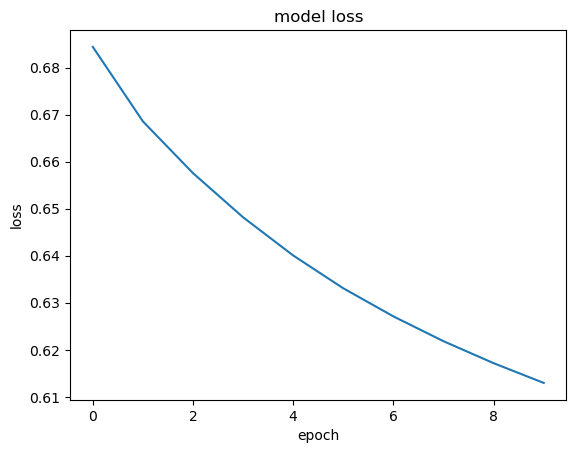

In [24]:
plt.plot(recommendation.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [25]:
MovieList = merged[['MovieId', 'Movie']].copy()
MovieList = MovieList.drop_duplicates(subset='MovieId', keep="last")

In [26]:
MovieList

,MovieId,Movie
680,673,Across the Tracks
986,976,Revenge of the Nerds III: The Next Generation
3770,2485,Syd Barrett: Crazy Diamond
3868,2543,"Lewis Black: Red, White and Screwed"
3872,2547,John Leguizamo: Freak
...,...,...
1122448,4554,Smurfs: The Lost Village
1122449,1198,Dune
1122450,4540,Hunter Killer
1122451,1013,Ford v Ferrari


In [27]:
user_id = int(input("Enter user id (1-11691): "))

movies_watched_by_user = merged2[merged2.UserId == user_id]
movies_not_watched = MovieList[
    ~MovieList["MovieId"].isin(movies_watched_by_user.MovieId.values)
]["MovieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]

user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

ratings = model.predict(user_movie_array).flatten() 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))

print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="Rating", ascending=False)
    .head(10)
    .MovieId.values
)
movie_df_rows = MovieList[MovieList["MovieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.Movie)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = MovieList[MovieList["MovieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.Movie)

Enter user id (1-11691): 31
Showing recommendations for user: 31
Movies with high ratings from user
--------------------------------
Pulp Fiction
The Big Lebowski
Django Unchained
Shaun of the Dead
In Bruges
The Fall
Moonrise Kingdom
Schindler's List
Mad Max: Fury Road
Alita: Battle Angel
--------------------------------
Top 10 movie recommendations
--------------------------------
The Shawshank Redemption
Star Wars: Episode IV - A New Hope
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Return of the King
The Dark Knight
The Godfather Part II
Star Wars: Episode V - The Empire Strikes Back
Jaws
Aliens
Psycho
